In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 1️⃣ Step 1: Create a 3D dataset
# Example: generate 100 random points around a 3D plane
np.random.seed(42)
X = np.random.randn(100, 3) @ np.array([[1, 0.5, 0.2],
                                        [0.3, 1, 0.4],
                                        [0.1, 0.2, 0.8]])  # correlated data

print("Original Data Shape:", X.shape)

Original Data Shape: (100, 3)


In [3]:
# 2️⃣ Step 2: Center the data (subtract the mean of each column)
mean_vec = np.mean(X, axis=0)
X_centered = X - mean_vec

In [4]:
# 3️⃣ Step 3: Compute Covariance Matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[0.725139   0.55806368 0.20349634]
 [0.55806368 1.06287273 0.46651597]
 [0.20349634 0.46651597 0.84522704]]


In [5]:
# 4️⃣ Step 4: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [6]:
# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [7]:
# 5️⃣ Step 5: Select top 2 eigenvectors (for 2D projection)
top2_eigenvectors = eigenvectors[:, :2]

In [8]:
# 6️⃣ Step 6: Project the 3D data onto 2D plane
X_projected = X_centered @ top2_eigenvectors
print("\nProjected Data Shape:", X_projected.shape)


Projected Data Shape: (100, 2)


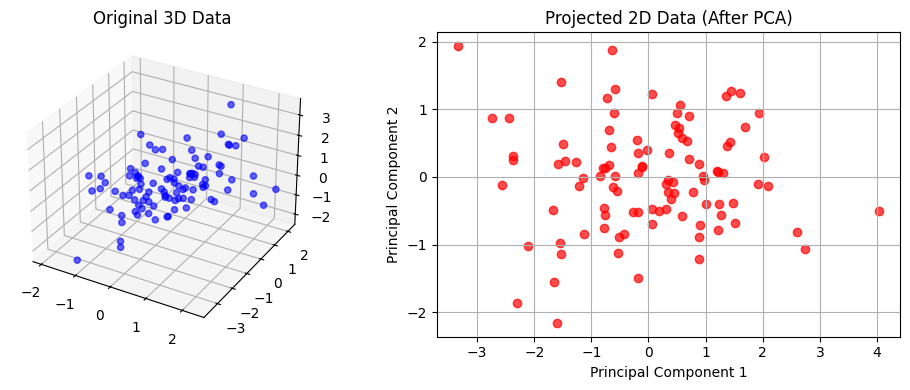

In [9]:
# 7️⃣ Step 7: Visualization
fig = plt.figure(figsize=(10, 4))

# Original 3D data
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='blue', alpha=0.6)
ax.set_title("Original 3D Data")

# Projected 2D data
plt.subplot(1, 2, 2)
plt.scatter(X_projected[:, 0], X_projected[:, 1], color='red', alpha=0.7)
plt.title("Projected 2D Data (After PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()